In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
IMG_SIZE = 32
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE

# Preprocessing function (resize + normalize)
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(10000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/tmp/ipython-input-5-4261394852.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.4023 - loss: 1.7341 - val_accuracy: 0.4539 - val_loss: 1.5656
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.4989 - loss: 1.4297 - val_accuracy: 0.5294 - val_loss: 1.4424
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5196 - loss: 1.3656 - val_accuracy: 0.5412 - val_loss: 1.3429
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5369 - loss: 1.3257 - val_accuracy: 0.5527 - val_loss: 1.3242
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.5496 - loss: 1.2763 - val_accuracy: 0.5844 - val_loss: 1.2153
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5648 - loss: 1.2472 - val_accuracy: 0.5671 - val_loss: 1.2586
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5726 - loss: 1.2172 - val_accuracy: 0.5748 - val_loss: 1.2529
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.5806 - loss: 1

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


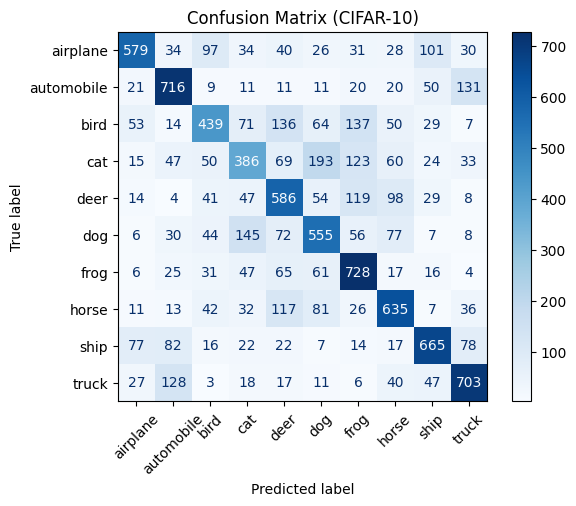

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)


y_true = np.concatenate([y for x, y in test_ds], axis=0)


cm = confusion_matrix(y_true, y_pred)
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix (CIFAR-10)")
plt.grid(False)
plt.show()


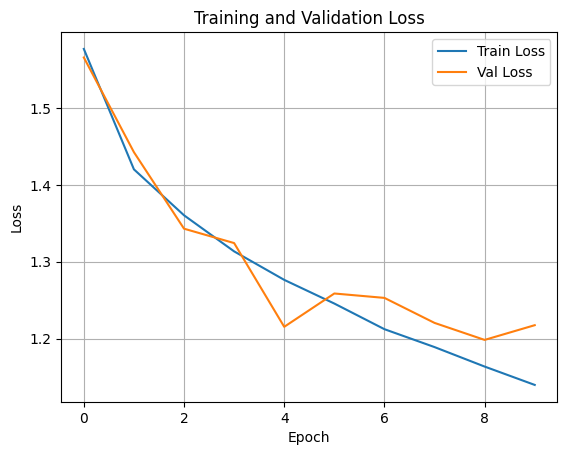

In [ ]:
# 📊 Plot Training and Validation Loss


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
